In [24]:
import matplotlib.pyplot as plt
from math import exp

In [25]:
def fx(t, xvn, yvn):
    return 5*xvn + 3*yvn

def fy(t, xvn, yvn):
    return -3*xvn - yvn

def fx2(t):
    return (1 + 6 * t) * exp(2 * t)

def fy2(t):
    return (1 - 6 * t) * exp(2 * t)

In [26]:
# неявный 1
def jac1(T, xvn, yvn, t, table, k):
  def jac_f(x):
    return [[5 * x[0] - 1, 3 * x[1]],
            [-3 * x[0], -1 * x[1] - 1]]
  return jac_f

In [27]:
def jac2(T, xvn, yvn, t, table, k):
    def jac(x):
        return [[(5 * table.a[1][1]) * T - 1, (3 * table.a[1][1]) * T],
                [(-3 * table.a[1][1]) * T, -table.a[1][1] * T - 1]]
    return jac

[scipy root](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html),
[Jacobian](<https://math.libretexts.org/Bookshelves/Calculus/Supplemental_Modules_(Calculus)/Vector_Calculus/3%3A_Multiple_Integrals/3.8%3A_Jacobians>)


In [28]:
# """Неявный метод Хаммера-Холлингсворта 4-го порядка"""
# def implicit2_method_v(T, xvn, yvn):
#      # Таблица Бутчера
#      a = [[1/4, 1/4 - math.sqrt(3)/6],
#           [1/4 + math.sqrt(3)/6, 1/4]]
#      # c = [(1/2 - math.sqrt(3)/6), 1/2 + math.sqrt(3)/6]
#      b = [1/2, 1/2]

#      # 5x+3y
#      # -3x-y
#      # x[0] = kx1, x[1] = kx2
#      def fk(vec):
#           # kx1 = T * fx(t, xvn + a[0][0] * kx1 + a[0][1] * kx2, yvn + a[0][0] * ky1 + a[0][1] * ky2)
#           # ky1 = T * fy(t, xvn + a[0][0] * kx1 + a[0][1] * kx2, yvn + a[0][0] * ky1 + a[0][1] * ky2)
#           # kx2 = T * fx(t, xvn + a[1][0] * kx1 + a[1][1] * kx2, yvn + a[1][0] * ky1 + a[1][1] * ky2)
#           # ky2 = T * fx(t, xvn + a[1][0] * kx1 + a[1][1] * kx2, yvn + a[1][0] * ky1 + a[1][1] * ky2)

#           # vec = [kx1, kx2, ky1, ky2]
#           xn = [xvn + T * (a[0][0] * vec[0] + a[0][1] * vec[1]), xvn + T * (a[1][0] * vec[0] + a[1][1] * vec[1])]
#           yn = [yvn + T * (a[0][0] * vec[2] + a[0][1] * vec[3]), yvn + T * (a[1][0] * vec[2] + a[1][1] * vec[3])]
          
#           # т.к. уравнения равны нулю, вычитаем k
#           return [fx(xn[0], yn[0]) - vec[0],  # kx
#                   fx(xn[1], yn[1]) - vec[1],
#                   fy(xn[0], yn[0]) - vec[2],  # ky
#                   fy(xn[1], yn[1]) - vec[3]]
     
#      def jac_fk(vec):
#           # Якобиан системы, частные производные от каждого
#           # уравнения по каждой переменной

#           # fx dx = 5
#           # fx dy = 3
#           # fy dx = -3
#           # fy dy = -1
#           # умножить на производные от xn, yn по vec[i]
#           # vec = [kx1, kx2, ky1, ky2] в таком же порядке берем частные производные
#           # в таком же порядке матрица вертикально

#           return np.array([[5 * T * a[0][0] - 1, 5 * T * a[0][1], 3 * T * a[0][0], 3 * T * a[0][1]],
#                           [5 * T * a[1][0], 5 * T * a[1][1] - 1, 3 * T * a[1][0], 3 * T * a[1][1]],
#                           [-3 * T * a[0][0], -3 * T * a[0][1], -T * a[0][0] - 1, -T * a[0][1]],
#                           [-3 * T * a[1][0], -3 * T * a[1][1], -T * a[1][0], -T * a[1][1] - 1]])


#      sol = optimize.root(fun=fk, x0=[0, 0, 0, 0],
#                          jac=jac_fk, method='hybr')
#      xn = xvn + T * (b[0] * sol.x[0] + b[1] * sol.x[1])
#      yn = yvn + T * (b[0] * sol.x[2] + b[1] * sol.x[3])

#      return (xn, yn)

[0.0, 0.7472144018302211, 1.1700712526502546, 1.4663370687934272, 1.6945957207744073, 1.8803128665695001, 2.03688192726104, 2.172223275130802, 2.2914117923959205, 2.3978952727983707]


/home/eva012/projectPractice/src/test_methods.py:71: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


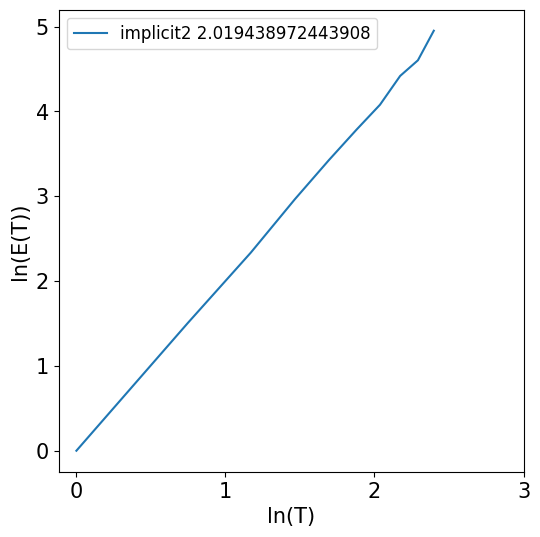

In [29]:
from num_methods import Solver2
from test_methods import Test2

t_start = 0
t_finish = 4
sol = Solver2((fx, fy), [jac1, jac2], [], (fx2(0), fy2(0)), (t_start, t_finish))
tester = Test2((fx2, fy2))
tester.test_methods((0.009, 0.1), 0.01, sol, [sol.implicit2])